### Aviation Data


## Business Understanding
A business venture is interested in purchasing and operating airplanes for commercial and private enterprises
They want to know the potential risks of aircrafts and im charged with

*   Determine which aircraft are lowest risk for the company to start this business endeavor
*   Translate Findings to actionable insights that the head of aviation can use to help decide which  aircraft to purchase



## Data Understanding

In [1]:
# First and foremost we import the appropriate libraries that we are going to use to handle this dataset
import pandas as pd
import numpy as np

In [2]:
# We need to load the AviationData.csv into a pandas file named df.To open the dataset we need to enter a special encoding
df = pd.read_csv("/content/AviationData.csv",encoding="ISO-8859-1",low_memory=False)

# Once weve opened it, lets get a rough summary view of how the data looks using .head()
df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

In [3]:
# Now we get an understanding of the rows and columns
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

This dataframe has 88889 rows and 31 columns


In [4]:
# We need to know the column names and what datatype each column carries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Aah we can see that majority of the columns here have objects as the data type. Lets Investigate further.

In [6]:
# Lets look at the summary statistics of the numerical columns shall we
df.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [7]:
# Okay okay, now lets see what were dealing with when it comes to the categorical data
df.describe(include="O").T

count unique             top   freq
Event.Id               88889  87951  20001214X45071      3
Investigation.Type     88889      2        Accident  85015
Accident.Number        88889  88863      WPR23LA045      2
Event.Date             88889  14782      1982-05-16     25
Location               88837  27758   ANCHORAGE, AK    434
Country                88663    219   United States  82248
Latitude               34382  25589         332739N     19
Longitude              34373  27154        0112457W     24
Airport.Code           50132  10374            NONE   1488
Airport.Name           52704  24870         Private    240
Injury.Severity        87889    109       Non-Fatal  67357
Aircraft.damage        85695      4     Substantial  64148
Aircraft.Category      32287     15        Airplane  27617
Registration.Number    87507  79104            NONE    344
Make                   88826   8237          Cessna  22227
Model                  88797  12318             152   2367
Amateur.Built          88787      2              No  80312
Engine.Type            81793     12   Reciprocating  69530
FAR.Description        32023     31             091  18221
Schedule               12582      3            NSCH   4474
Purpose.of.flight      82697     26        Personal  49448
Air.carrier            16648  13590           Pilot    258
Weather.Condition      84397      4             VMC  77303
Broad.phase.of.flight  61724     12         Landing  15428
Report.Status          82505  17074  Probable Cause  61754
Publication.Date       75118   2924      25-09-2020  17019

In [8]:
# Very Interesting! Were getting somewhere
# We can see that the column names have different formats, lest standardize them so that writing the code is abit easier

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(".","_")

## Data Cleaning

In [9]:
# We get to work now with some data cleaning. Lets look at what columns have null values
df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          13771
dtype: int64

In [10]:
# We can fill the null values of some of the columns with 'Unknown' so that it doesnt affect our analysis later on

df["aircraft_damage"]=df["aircraft_damage"].fillna('Unknown')
df["injury_severity"]=df["injury_severity"].fillna('Unknown')
df["aircraft_category"]=df["aircraft_category"].fillna('Unknown')
df["make"]=df["make"].fillna('Unknown')
df["model"]=df["model"].fillna('Unknown')
df["amateur_built"]=df["amateur_built"].fillna('Unknown')
df["engine_type"]=df["engine_type"].fillna('Unknown')
df["weather_condition"]=df["weather_condition"].fillna('Unknown')
df["broad_phase_of_flight"]=df["broad_phase_of_flight"].fillna('Unknown')
df['purpose_of_flight']=df['purpose_of_flight'].fillna('Unknown')

In [11]:
# Lets check if that worked
df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number        1382
make                          0
model                         0
amateur_built                 0
number_of_engines          6084
engine_type                   0
far_description           56866
schedule                  76307
purpose_of_flight             0
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition             0
broad_phase_of_flight         0
report_status              6384
publication_date          13771
dtype: int64

In [12]:
# Excellent! It did. Now for the specific task that we have been given, some columns we need because they will be key to make our final analysis
# Some other columns we dont, so lets just get the ones we need

columns_to_keep = ["event_id","location","country","injury_severity","aircraft_damage","aircraft_category","make","model","amateur_built","number_of_engines","engine_type","purpose_of_flight","weather_condition","broad_phase_of_flight"]

In [13]:
# We can copy the original dataframe and store it in another one so we dont lose the data incase we need it again.
# On this new dataframe now we can edit it how we want. Lets filter it to just the columns we need.

df1 = df.copy()
df1 = df1[columns_to_keep]
df1.head()

event_id         location        country injury_severity  \
0  20001218X45444  MOOSE CREEK, ID  United States        Fatal(2)   
1  20001218X45447   BRIDGEPORT, CA  United States        Fatal(4)   
2  20061025X01555    Saltville, VA  United States        Fatal(3)   
3  20001218X45448       EUREKA, CA  United States        Fatal(2)   
4  20041105X01764       Canton, OH  United States        Fatal(1)   

  aircraft_damage aircraft_category      make     model amateur_built  \
0       Destroyed           Unknown   Stinson     108-3            No   
1       Destroyed           Unknown     Piper  PA24-180            No   
2       Destroyed           Unknown    Cessna      172M            No   
3       Destroyed           Unknown  Rockwell       112            No   
4       Destroyed           Unknown    Cessna       501            No   

   number_of_engines    engine_type purpose_of_flight weather_condition  \
0                1.0  Reciprocating          Personal               UNK   
1                1.0  Reciprocating          Personal               UNK   
2                1.0  Reciprocating          Personal               IMC   
3                1.0  Reciprocating          Personal               IMC   
4                NaN        Unknown          Personal               VMC   

  broad_phase_of_flight  
0                Cruise  
1               Unknown  
2                Cruise  
3                Cruise  
4              Approach

In [14]:
# Lets see if we can find anything strange about the columns were dealing with. Duplicates? Distorted data?

print(df["aircraft_damage"].unique())
print(df["injury_severity"].unique())
print(df["aircraft_category"].unique())
print(df["amateur_built"].unique())
print(df["engine_type"].unique())
print(df["weather_condition"].unique())
print(df["broad_phase_of_flight"].unique())
print(df['purpose_of_flight'].unique())
print(df['number_of_engines'].unique())



['Destroyed' 'Substantial' 'Minor' 'Unknown']
['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'


In [15]:
# Uh-oh, plenty of trouble. Lets look at the unique values and deal with everything accordingly

df1["aircraft_category"]=df1["aircraft_category"].str.replace('UNK','Unknown')
df1["engine_type"]=df1["engine_type"].str.replace('UNK','Unknown')
df1["weather_condition"]=df1["weather_condition"].str.replace('UNK','Unk')
df1["weather_condition"]=df1["weather_condition"].str.replace('Unknown','Unk')


In [16]:
# On the injury severity column, it seems like it counts everytime it sees fatal. Lets take care of that and get the proper data

df1["injury_severity"]=df1["injury_severity"].str.split('(').str[0]
df1["injury_severity"].value_counts()

injury_severity
Non-Fatal      67357
Fatal          17826
Incident        2219
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

In [17]:
# Last but certainly not least lets fill the null value in our only numerical column

df1['number_of_engines']=df1['number_of_engines'].fillna("Unknown")
df1['number_of_engines'].unique()

array([1.0, 'Unknown', 2.0, 0.0, 3.0, 4.0, 8.0, 6.0], dtype=object)

## Data Wrangling and Exploratory Data Analysis

In [18]:
# Weve gotten to the point of EDA and visualizing our data for easier understanding
# Lets import the appropriate libraries for this

import matplotlib.pyplot as plt
import seaborn as sns

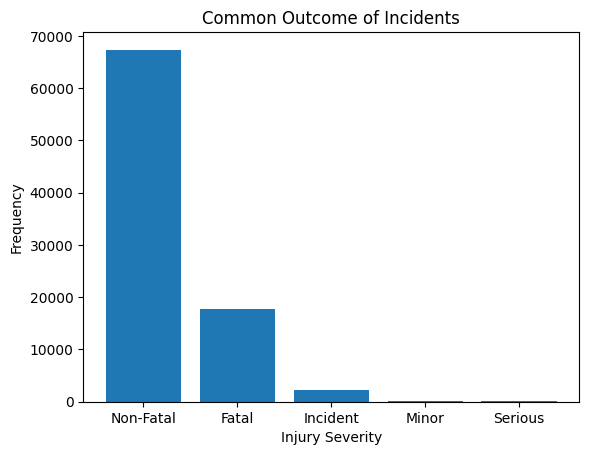

In [19]:
# Lets look at the most common outcome of incidents by plotting a bar graph using injury severity

fig, ax = plt.subplots()

counts = df1["injury_severity"].value_counts()

# Filter out 'Unavailable' and 'Unknown' we dont need them to get a verdict of our data
counts = counts.drop(['Unavailable', 'Unknown'])
ax.bar(counts.index,counts.values) # what goes in our x plane and y plane
ax.set_xlabel("Injury Severity") # Label our x plane
ax.set_ylabel("Frequency") # Label our y plane
ax.set_title("Common Outcome of Incidents") # And what is the title of our graph
plt.show();

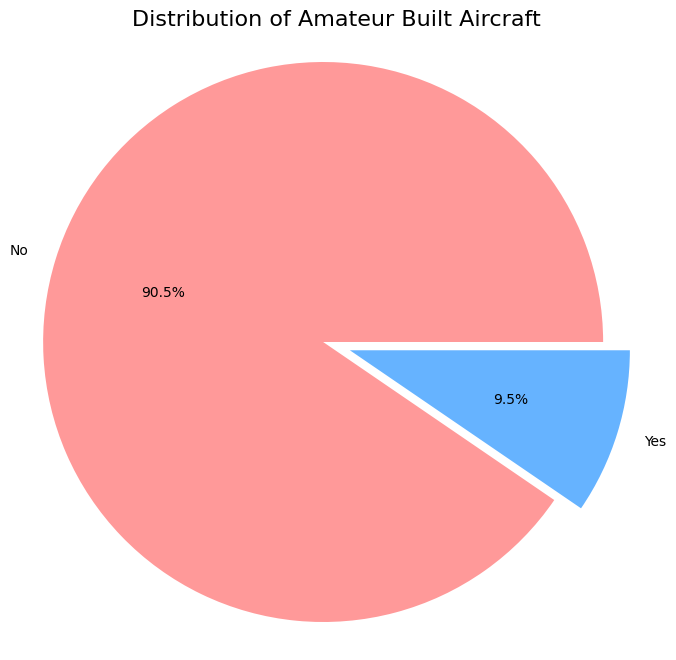

In [20]:
# We can also take a look at the distribution of these planes, are most of them amateur built or not?
# Lets use a pie chart to see this

plt.figure(figsize=(8, 8))
buildcounts= df1["amateur_built"].value_counts()
buildcounts= buildcounts.drop("Unknown") # we dont need 'Unknown in our data

colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) # This helps us to identify a singular variable and makes it look more presentable
plt.pie(buildcounts.values, labels=buildcounts.index, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title("Distribution of Amateur Built Aircraft",fontsize=16)
plt.axis('equal')
plt.show()

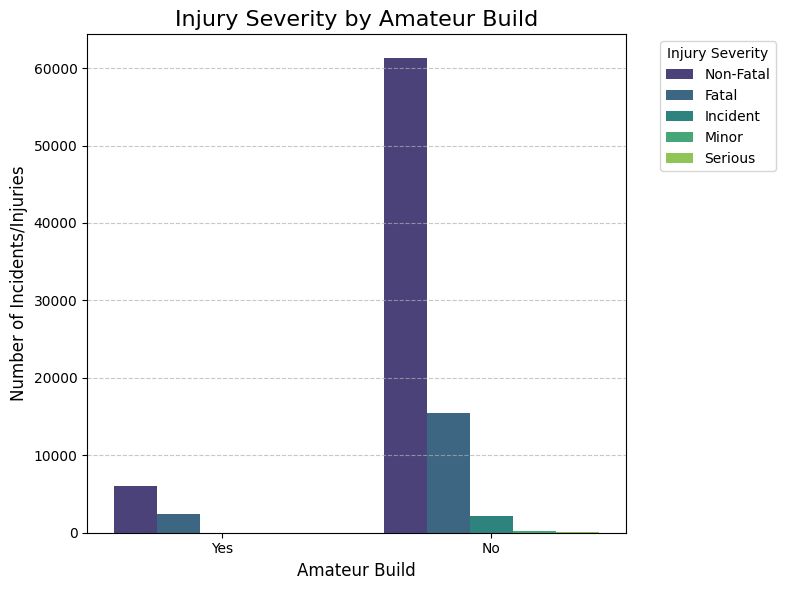

In [21]:
# Okay lets see if whether an amateur built engine affected the casuality numbers in our dataset

# We remove the noise, We dont need 'Unknown' and 'Unavailable' in our data
amateur_severity = df1[(df1["injury_severity"] != "Unknown") & (df1["injury_severity"] != "Unavailable")].groupby('amateur_built')["injury_severity"].value_counts()

plt.figure(figsize=(8, 6))
amateur_severity_df = amateur_severity.reset_index(name='count') # Convert Series to DataFrame
sns.barplot(
    x='amateur_built',      # The primary category on the x-axis
    y='count',              # The count values on the y-axis
    hue='injury_severity',  # The variable to group by within each x-category
    data=amateur_severity_df, # The DataFrame with counts
    order=['Yes', 'No'],    # Ensure 'Yes' comes before 'No'
    palette='viridis'       # Color palette
)
plt.title('Injury Severity by Amateur Build', fontsize=16)
plt.xlabel('Amateur Build', fontsize=12)
plt.ylabel('Number of Incidents/Injuries', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout()
plt.show()

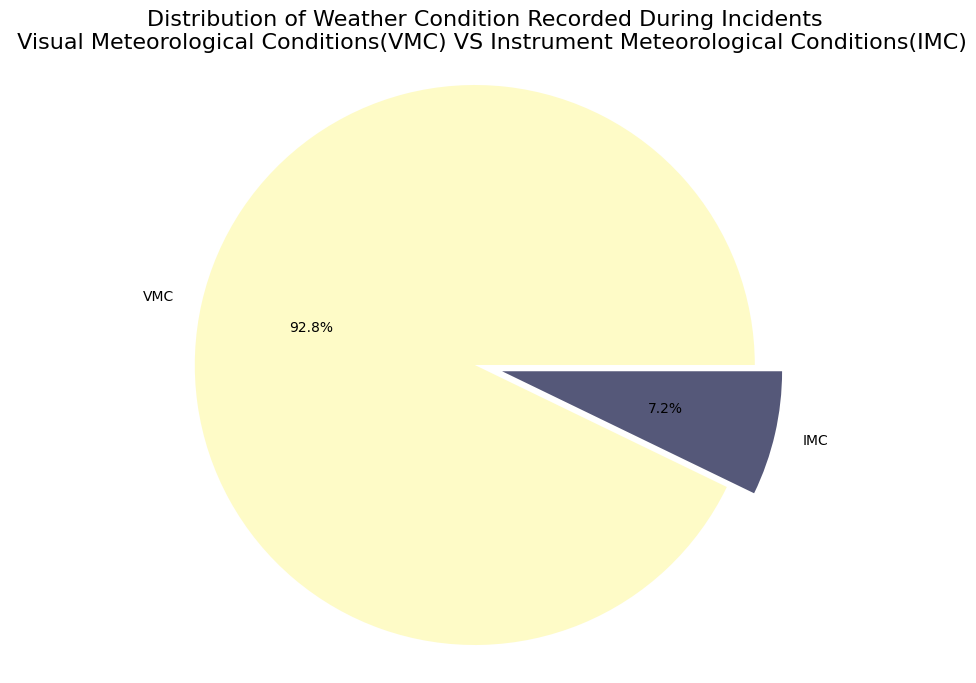

In [22]:
# Lets try and see the distribution of the weather condition recorded during the incident

plt.figure(figsize=(8, 8))
weathercounts= df1["weather_condition"].value_counts()
weathercounts= weathercounts.drop("Unk") # Lets drop the 'Unk' values

colors = ['#FEFBC7','#555879']
explode = (0.1, 0)
plt.pie(weathercounts.values, labels=weathercounts.index, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title("Distribution of Weather Condition Recorded During Incidents \n Visual Meteorological Conditions(VMC) VS Instrument Meteorological Conditions(IMC)",fontsize=16)

plt.axis('equal')
plt.show()

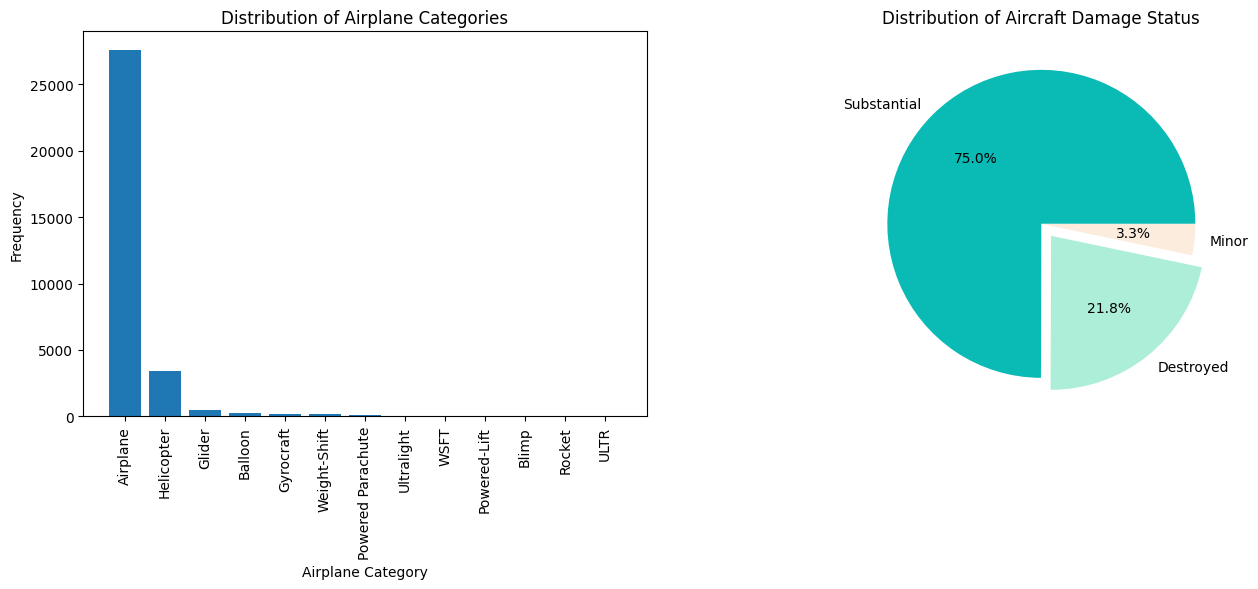

In [23]:
# We can carry out two seperate univariate analysis with different visualisations
# One to find out the distribution of the aircraft categories, which is the majority of the data?
# And the other we can look at the most common damage status among these aircrafts

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(16, 5))

category_counts=df1["aircraft_category"].value_counts()
category_counts=category_counts.drop("Unknown")

damage_counts=df1["aircraft_damage"].value_counts()
damage_counts=damage_counts.drop("Unknown")
colors=["#0ABAB5","#ADEED9","#FCECDD"]

ax1.bar(category_counts.index,category_counts.values)
ax1.tick_params(axis="x", labelrotation=90)
explode = (0,0.1,0 )
ax1.set_xlabel("Airplane Category")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Airplane Categories");
ax2.pie(damage_counts.values,labels=damage_counts.index,autopct='%1.1f%%', colors=colors, explode=explode)
ax2.set_title("Distribution of Aircraft Damage Status");

In [24]:
# As we can see, a substantial amount of the data is Airplanes. Lets investigate further

In [25]:
# Lets get the top makes from df1. Since there is about 8000+ different makes, we can make our work more focused by getting the top 20
top_makes_list = df1["make"].value_counts().nlargest(20).index.tolist()

# We can also get the top 10 makes just in case we need a more focused group later on during the analysis
top_10_makes_list = df1["make"].value_counts().nlargest(10).index.tolist()


In [26]:
# Now we can use the variable we created earlier to get the top 20 makes and create a new column
# We can call this column model_group since it will help us group the models easier
# The top 20 makes will be as they are and the rest of the makes we'll aggregate them as 'other'

df1["model_group"] = df1["make"].apply(lambda x: x if x in top_makes_list else "Other")
df1["model_group"].unique()

array(['Other', 'Piper', 'Cessna', 'Mcdonnell Douglas', 'Beech',
       'Bellanca', 'Bell', 'Grumman', 'Maule', 'Air Tractor', 'Mooney',
       'Boeing', 'Hughes', 'Aeronca', 'Robinson', 'Schweizer', 'PIPER',
       'BELL', 'CESSNA', 'BOEING', 'BEECH'], dtype=object)

In [27]:
# Notice how some makes have the same name but different cases, thus grouping them as seperate makes
# Lets standardize them and get the right output

df1["model_group"]=df1["model_group"].str.lower()
df1["model_group"].unique()

array(['other', 'piper', 'cessna', 'mcdonnell douglas', 'beech',
       'bellanca', 'bell', 'grumman', 'maule', 'air tractor', 'mooney',
       'boeing', 'hughes', 'aeronca', 'robinson', 'schweizer'],
      dtype=object)

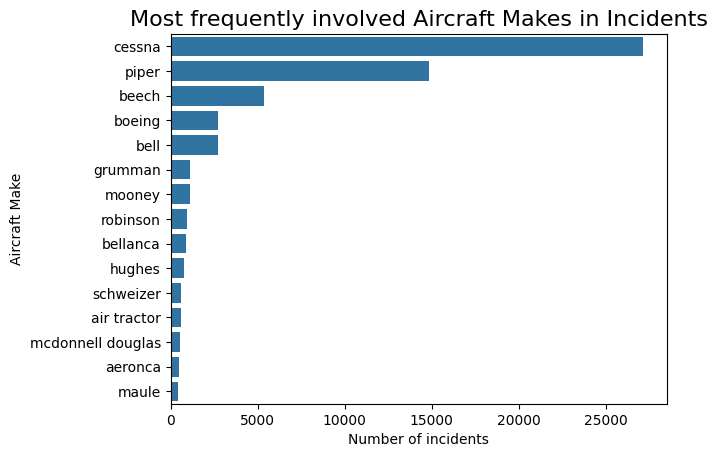

In [28]:
# Now lets see which are the most frequently involved Aircraft makes in Incidents
# We'll plot a horisontal bar plot to take a look at this data

make_frequency=df1["model_group"].value_counts().drop("other")

plt.figure()
sns.barplot(y=make_frequency.index,x=make_frequency.values)
plt.title("Most frequently involved Aircraft Makes in Incidents",fontsize=16)
plt.xlabel("Number of incidents")
plt.ylabel("Aircraft Make")
plt.show()

In [29]:
# Lets do the same with the top 10 list

df1["top_makes"] = df1["make"].apply(lambda x: x if x in top_10_makes_list else "other")
df1["top_makes"].unique()

array(['other', 'Piper', 'Cessna', 'Beech', 'Bell', 'Grumman', 'Mooney',
       'Boeing', 'PIPER', 'CESSNA', 'BOEING'], dtype=object)

In [30]:
# Also need to be standardized

df1["top_makes"]=df1["top_makes"].str.lower()
df1["top_makes"].unique()

array(['other', 'piper', 'cessna', 'beech', 'bell', 'grumman', 'mooney',
       'boeing'], dtype=object)

In [31]:
# The heavy hitters from this dataset appear to be piper, cessna, beech, bell and boeing.
# These are the ones we want to get our models from
# Lets single them out and get further done on them

makes_to_exclude = ['grumman', 'mooney']

# So to get a proper grouping, lets remove the noise, 'other' and 'Unknown' will not help us whatsoever
# We can also set the model to get the top 5 models from each of these makes

model_counts = df1[(df1["top_makes"] != "other") & (df1["model"] != "Unknown") & (~df1["top_makes"].isin(makes_to_exclude))].groupby("top_makes")['model'].value_counts()
top_5_models_per_make = model_counts.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
top_5_models_per_make

top_makes  model    
beech      A36           293
           58            179
           C23           156
           35            128
           V35B          125
bell       206B          421
           206L-1        150
           47G-2          80
           206L-3         78
           47G            78
boeing     737           489
           A75N1         107
           777            95
           747            85
           767            68
cessna     152          2366
           172          1753
           172N         1163
           150           829
           172M          798
piper      PA-28-140     932
           PA-18         578
           PA-28-180     572
           PA-18-150     571
           PA-28-161     565
Name: count, dtype: int64

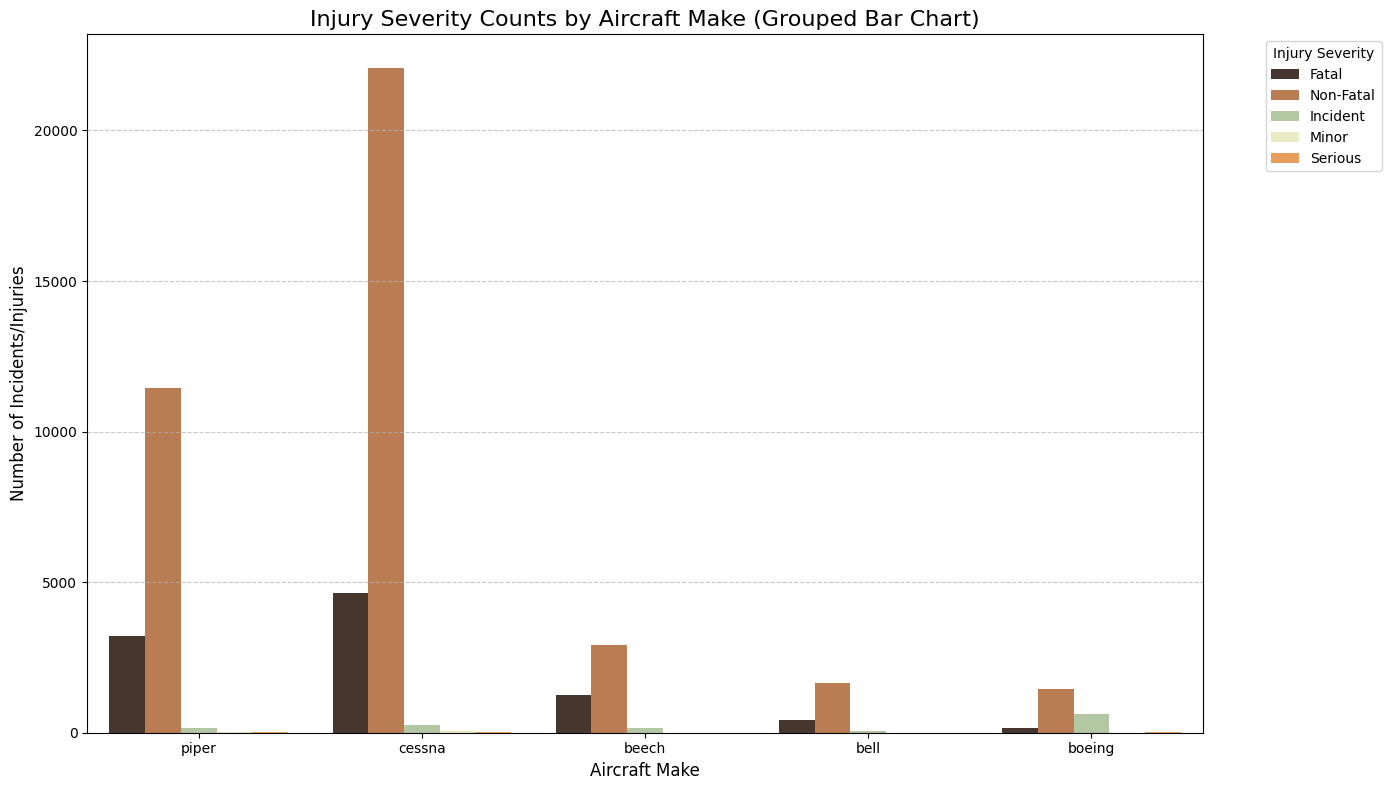

In [32]:
# Now we can try and understand the data from the make and get to know the injury severity from each make.

# Lets target the heavy hitters
target_makes_list = ['beech', 'bell', 'boeing', 'cessna', 'piper']
df_target_makes = df1[
    df1['top_makes'].isin(target_makes_list) &
    (df1['injury_severity'] != 'Unknown') &
    (df1['injury_severity'] != 'Unavailable')
].copy() # Lets remove the noise

custom_palette = ['#4B352A','#CA7842','#B2CD9C','#F0F2BD','#FF9B45'] # We can use these colors to represent the different injury severities

plt.figure(figsize=(14, 8))
sns.countplot(
    x='top_makes',           # Primary categories on the x-axis (Aircraft Makes)
    hue='injury_severity',   # Variable to group bars by (Injury Severity)
    data=df_target_makes,    # The filtered DataFrame to plot from
    palette=custom_palette       # Color palette for different injury severities
)
plt.title('Injury Severity Counts by Aircraft Make (Grouped Bar Chart)', fontsize=16)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Incidents/Injuries', fontsize=12)

plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines for easier comparison of counts
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

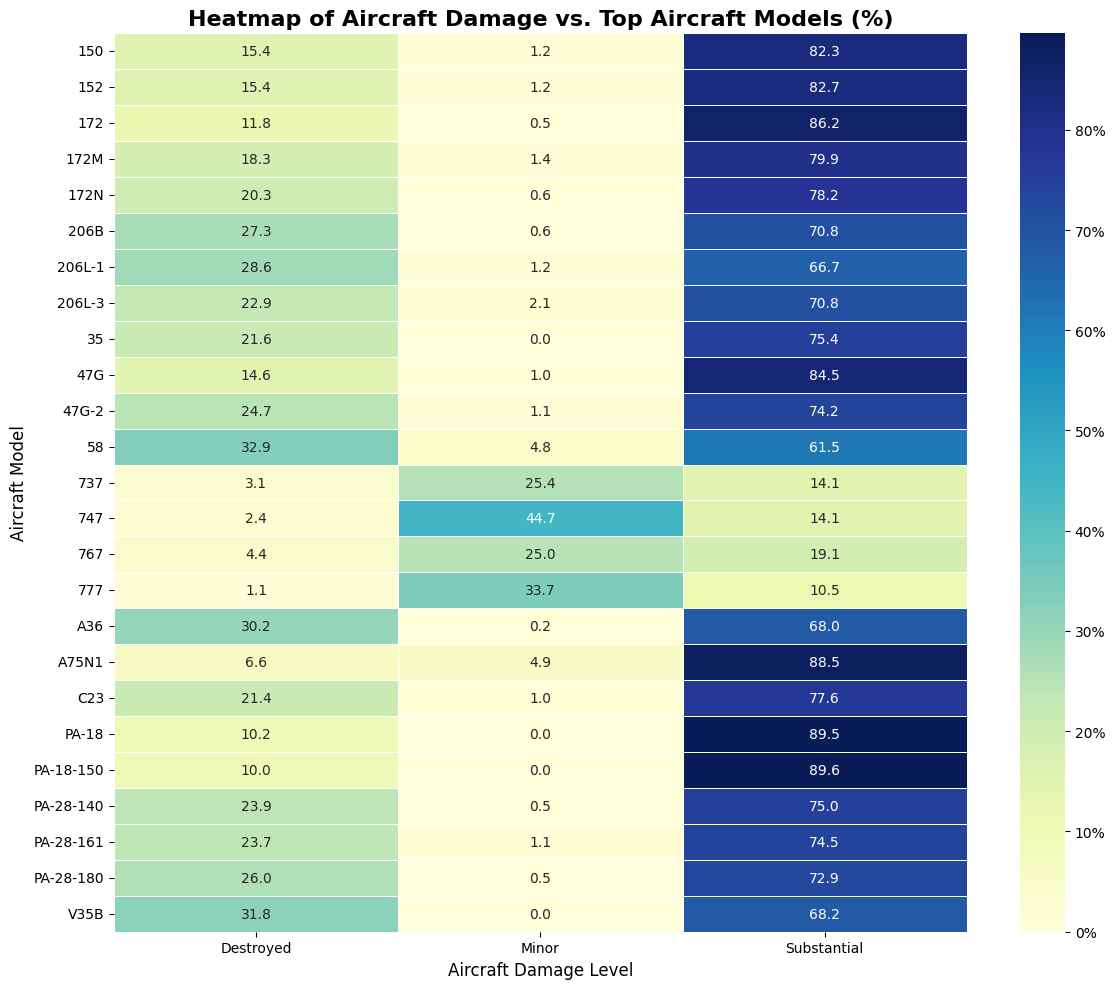

In [33]:
# Were going to visualise a heatmap so that we can identify the specific damage that occured on each of the top aircraft models
# The heatmap would help us know the exact model, the numbers which occured in that specific model and the type of damage it had

# Lets get the index and level values from the top 5 models from each make from the code we did earlier
top_model_list = top_5_models_per_make.index.get_level_values('model').unique()

# Filter df1 to exclude models from 'grumman' and 'mooney' makes and include only the top models
df_filtered_for_heatmap = df1[(df1['model'].isin(top_model_list))]

crosstab_model_damage = pd.crosstab(df_filtered_for_heatmap['model'], df_filtered_for_heatmap['aircraft_damage'],normalize='index')* 100

# Drop the 'Unknown' column explicitly using axis=1
if 'Unknown' in crosstab_model_damage.columns:
    crosstab_model_damage = crosstab_model_damage.drop('Unknown', axis=1)


plt.figure(figsize=(12, 10)) # Adjust figure size for better readability

heatmap = sns.heatmap(
    crosstab_model_damage,
    annot=True,      # Write the data value in each cell
    fmt=".1f",         # Format annotations as integers
    cmap='YlGnBu',   # A nice color map (Yellow-Green-Blue)
    linewidths=.5,   # Add thin lines between cells
    cbar_kws={'format': '%.0f%%'} # Label for the color bar on the side
)

# Add titles and labels for clarity
plt.title('Heatmap of Aircraft Damage vs. Top Aircraft Models (%)', fontsize=16, weight='bold')
plt.xlabel('Aircraft Damage Level', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Show the plot
plt.show()

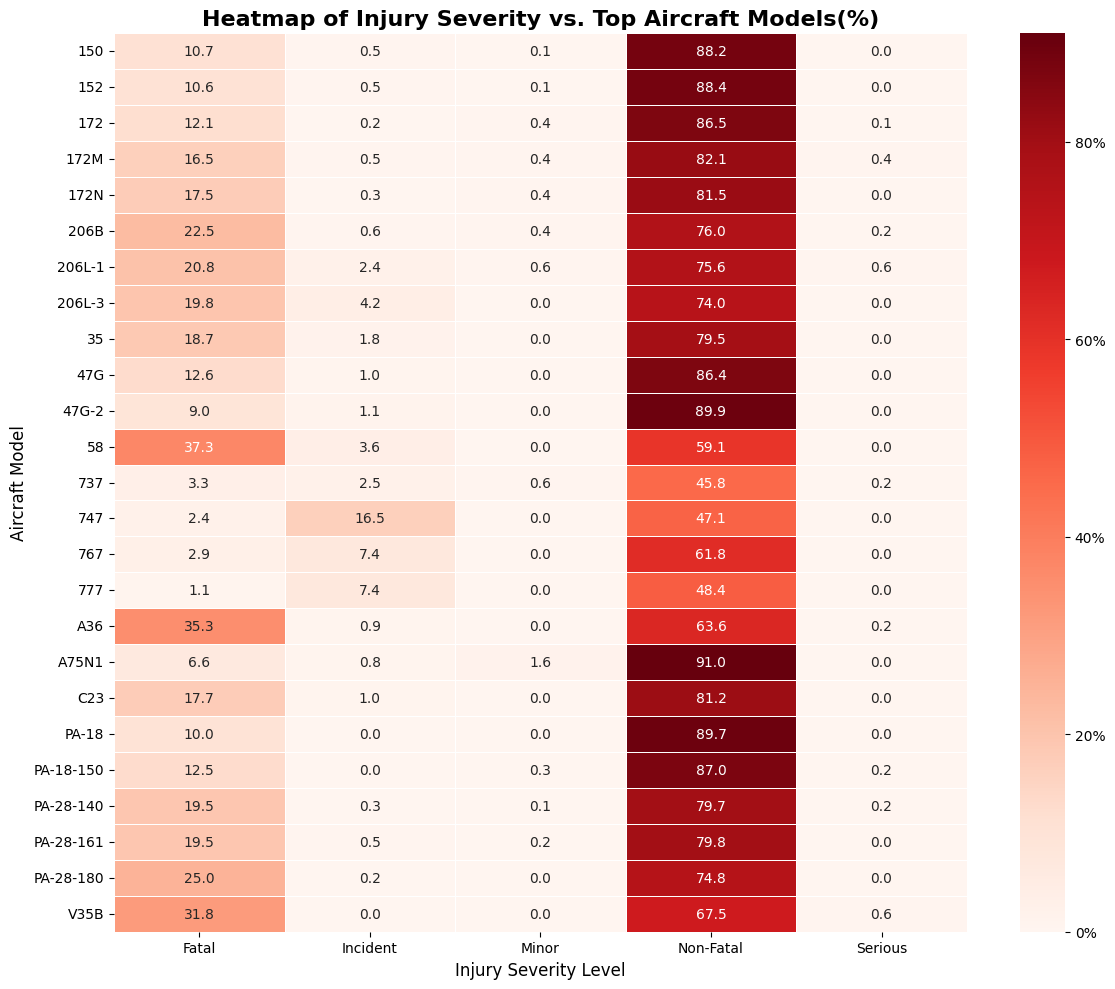

In [34]:
# From the above data we can also make a heatmap to see the injury severity of the crashes
# We can know the casualty and injury severity of the specific models

top_model_list = top_5_models_per_make.index.get_level_values('model').unique()

# Filter df1 to exclude models from 'grumman' and 'mooney' makes and include only the top models
df_filtered_for_heatmap = df1[(df1['model'].isin(top_model_list))]


crosstab_model_injury = pd.crosstab(df_filtered_for_heatmap['model'], df_filtered_for_heatmap['injury_severity'],normalize='index')* 100

crosstab_model_injury = crosstab_model_injury.drop(['Unknown', 'Unavailable'], axis=1)
plt.figure(figsize=(12, 10))


heatmap = sns.heatmap(
    crosstab_model_injury,
    annot=True,
    fmt=".1f",
    cmap='Reds', # MODIFIED: Changed colormap to 'Reds' which is intuitive for severity
    linewidths=.5,
    cbar_kws={'format': '%.0f%%'}
)


plt.title('Heatmap of Injury Severity vs. Top Aircraft Models(%)', fontsize=16, weight='bold')
plt.xlabel('Injury Severity Level', fontsize=12) # Changed from 'Aircraft Damage'
plt.ylabel('Aircraft Model', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

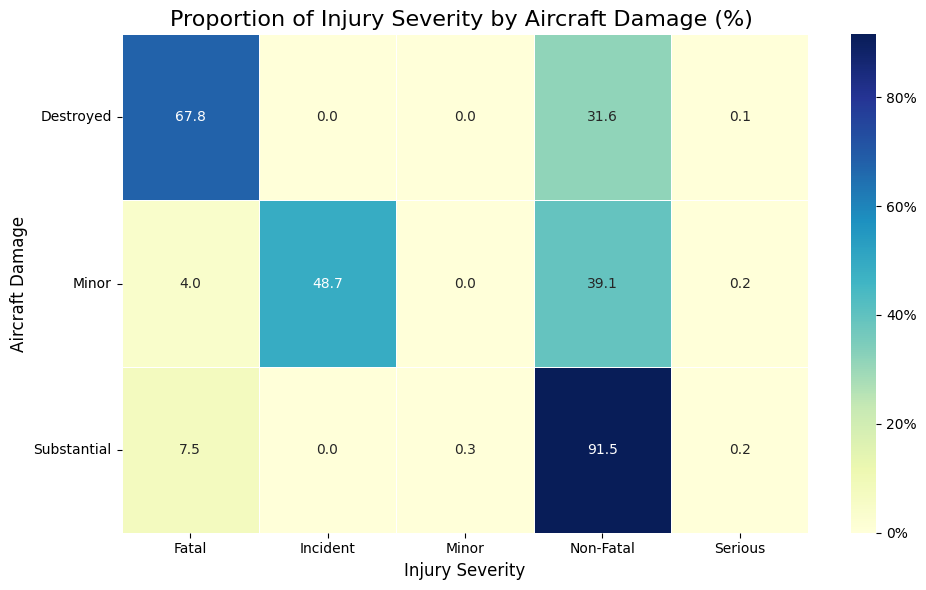

In [35]:
# We want to take a look at the relationship between aircraft damage and injury severity
# How much the damage of an aircraft would lead to fatality or not and serious or minor injuries
# We can use percentages instead of actual values to get a better understanding of the data

contingency_table_counts = pd.crosstab(df1['aircraft_damage'], df1['injury_severity'])
contingency_table_row_percent = pd.crosstab(df1['aircraft_damage'], df1['injury_severity'], normalize='index') * 100

# Drop 'Unknown' and 'Unavailable' columns from injury severity
contingency_table_row_percent = contingency_table_row_percent.drop(['Unknown', 'Unavailable'], axis=1)

# Drop 'Unknown' row from aircraft damage
contingency_table_row_percent = contingency_table_row_percent.drop('Unknown', axis=0)


plt.figure(figsize=(10, 6))
sns.heatmap(
    contingency_table_row_percent,
    annot=True,         # Show the percentage values
    fmt=".1f",          # Format to one decimal place
    cmap="YlGnBu",      # Color map (e.g., 'YlGnBu', 'viridis', 'plasma', 'Blues')
    linewidths=.5,      # Add lines between cells
    cbar_kws={'format': '%.0f%%'} # Format color bar as percentage
)
plt.title('Proportion of Injury Severity by Aircraft Damage (%) ', fontsize=16)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Aircraft Damage', fontsize=12)

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
# We can do an analysis on the engines of these planes. Lets take a look

df1['engine_type'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE'], dtype=object)

In [37]:
# Okay, since we have the number of engines and the engine types, we can be smart and try to organize these into a single dataset
# Lets group the engine information of these aircraft and come up with different classes that can categorize the engines better and simpler
# Lets create a function for it

def get_aircraft_class(row):
    engine_type = row['engine_type']
    num_engines = row['number_of_engines']

    # Handle the case where num_engines is 'Unknown'
    if num_engines == 'Unknown':
        return 'Other/Unknown Engine Type'

    # Now we can safely perform numerical comparisons
    if engine_type in ['Turbo Fan', 'Turbo Shaft', 'Turbo Prop', 'Turbo Jet', 'Geared Turbofan']:
        if num_engines == 1:
            return 'Single Engine Jet/Turbine'
        elif num_engines > 1:
            return 'Multi Engine Jet/Turbine'
    elif engine_type == 'Reciprocating':
        if num_engines == 1:
            return 'Single Engine Reciprocating'
        elif num_engines > 1:
            return 'Multi Engine Reciprocating'
        elif num_engines == 0:
            return 'Engine-less (Glider/Balloon)'
    elif engine_type in ['Electric', 'Hybrid Rocket', 'LR', 'NONE' , 'Unknown']:
        return 'Other/Unknown Engine Type'
    else:
        return 'Other/Unknown Engine Type'

df1["aircraft_class"] = df1.apply(get_aircraft_class, axis=1)

In [38]:
# Fantastic! Now we check our new column

df1["aircraft_class"].unique()

array(['Single Engine Reciprocating', 'Other/Unknown Engine Type',
       'Multi Engine Jet/Turbine', 'Multi Engine Reciprocating',
       'Single Engine Jet/Turbine', 'Engine-less (Glider/Balloon)'],
      dtype=object)

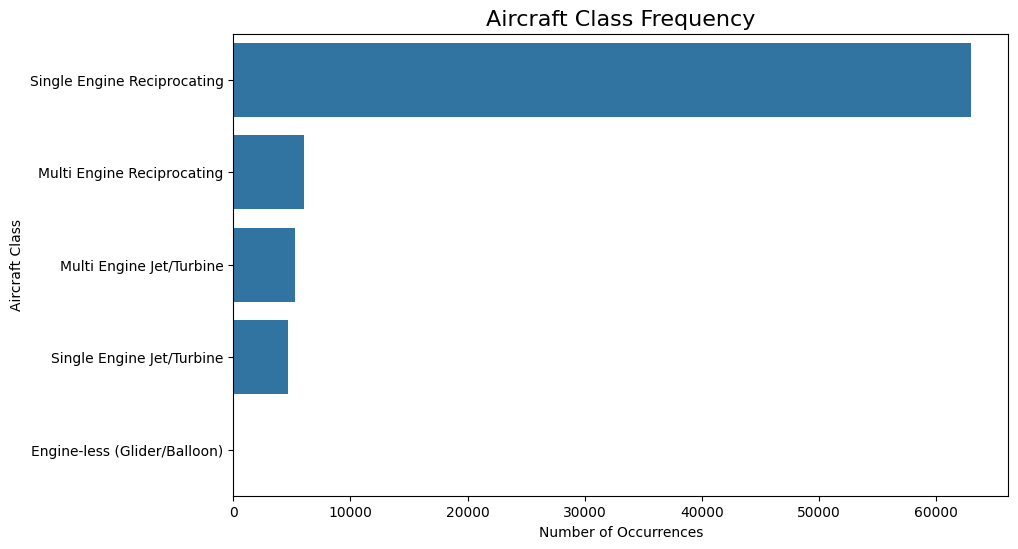

In [39]:
# We can try and see what engine class is most involved in the aircraft accidents
# Lets plot a bar chat to visualize this information

plt.figure(figsize=(10, 6))
# Filter out 'Other/Unknown Engine Type' value
engine_counts = df1[df1["aircraft_class"] != 'Other/Unknown Engine Type']["aircraft_class"]
sns.countplot(y=engine_counts, order=engine_counts.value_counts().index)
plt.title("Aircraft Class Frequency",fontsize=16)
plt.xlabel("Number of Occurrences")
plt.ylabel("Aircraft Class")
plt.show()

In [40]:
# The single engine reciprocating is involved in a herculian amount of these aircraft incidents, something to take note of

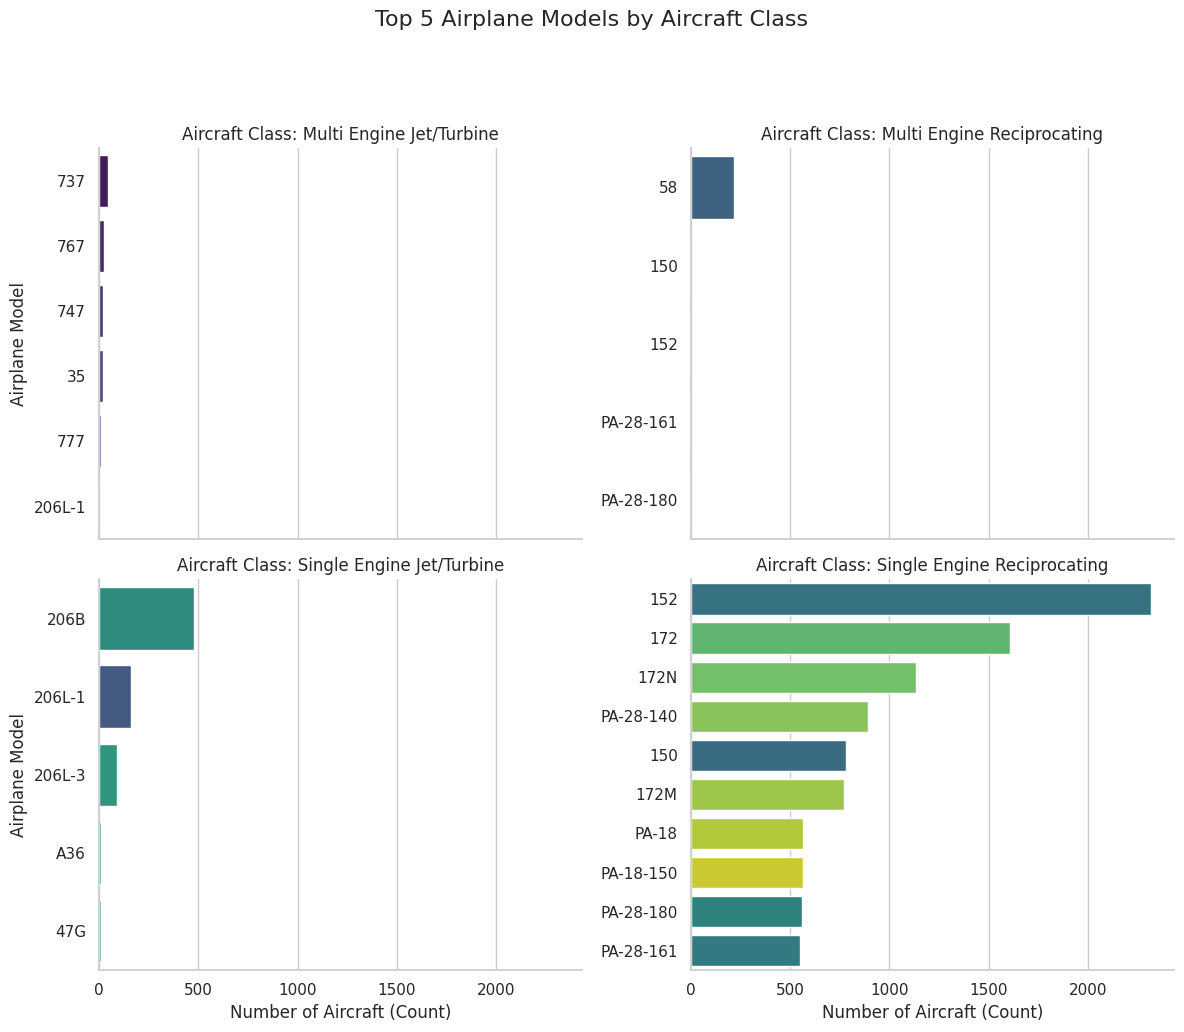

In [41]:
# From here we can take a look at the top models from each make and where they lie in terms of what engine they use
# This will help us get better visualisation for our analysis and help us come closer to a final verdict

classes_to_exclude = ['Engine-less (Glider/Balloon)', 'Other/Unknown Engine Type']
filtered_df = df1[~df1['aircraft_class'].isin(classes_to_exclude)].copy()

# Use top_5_models_per_make to filter the filtered_df
# We need to join or merge to filter based on the MultiIndex of top_5_models_per_make
filtered_df_with_top_models = filtered_df.merge(
    top_5_models_per_make.reset_index()[['top_makes', 'model']],
    on=['model'],
    how='inner'
)

# Group by aircraft_class and model and count the occurrences
model_class_counts = filtered_df_with_top_models.groupby(['aircraft_class', 'model']).size().reset_index(name='count')

# This prevents the charts from becoming cluttered. We'll take the top 10 models per class.
top_n = 10
top_models_per_class = model_class_counts.groupby('aircraft_class').apply(
    lambda x: x.nlargest(top_n, 'count'),include_groups=False
).reset_index()

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=top_models_per_class,
    x='count',
    y='model',
    hue='model',
    col='aircraft_class',
    kind='bar',
    col_wrap=2,
    sharey=False,        # Crucial for showing different models in each plot
    height=5,            # Height of each individual plot
    aspect=1.2,          # Aspect ratio of each plot
    palette='viridis'
)


# Set titles for each subplot and adjust labels
g.fig.suptitle('Top 5 Airplane Models by Aircraft Class', y=1.03, fontsize=16)
g.set_axis_labels("Number of Aircraft (Count)", "Airplane Model")
g.set_titles("Aircraft Class: {col_name}")
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make space for the main title

# Display the plot
plt.show()

In [42]:
# Now that we know what aircraft models lie where, we want to see the impact of these incidents and their severity
# First we can look at the casualty for each aircraft class

new_injury_severity = df1[(df1["injury_severity"] != "Unknown") & (df1["injury_severity"] != "Unavailable")] # remove the noise
class_vs_injury = new_injury_severity.groupby("aircraft_class")["injury_severity"].value_counts()

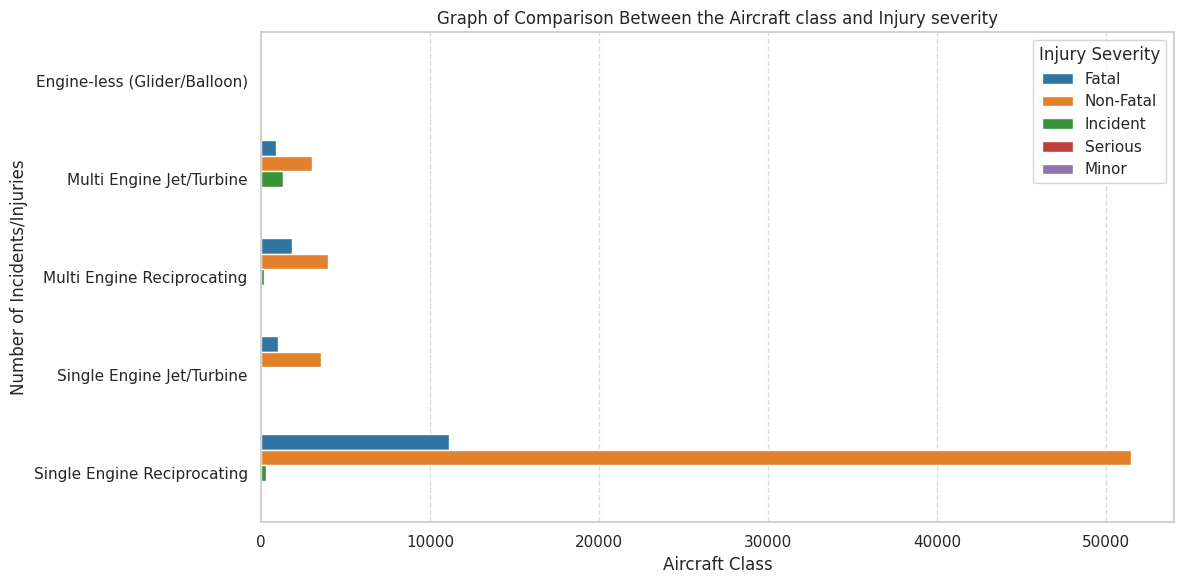

In [43]:
# Lets plot a graph to see the relationship between the aircraft class and injury severity

plt.figure(figsize=(12, 6))
class_vs_injury_df = class_vs_injury.reset_index()

# Filter out 'Other/Unknown Engine Type' from the DataFrame used for plotting
class_vs_injury_df_filtered = class_vs_injury_df[class_vs_injury_df['aircraft_class'] != 'Other/Unknown Engine Type']
my_custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

sns.barplot(y='aircraft_class',x='count',hue='injury_severity',data=class_vs_injury_df_filtered,palette=my_custom_palette)
plt.title("Graph of Comparison Between the Aircraft class and Injury severity")
plt.xlabel('Aircraft Class')
plt.ylabel('Number of Incidents/Injuries')
plt.legend(title='Injury Severity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

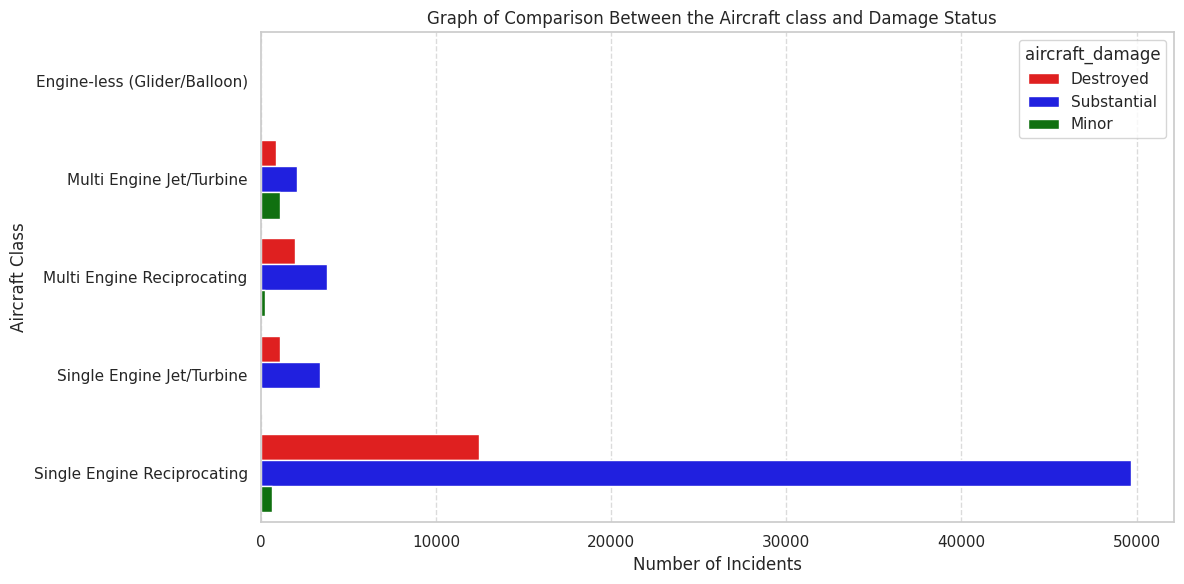

In [44]:
# We can also try and see the relationship between the aircraft class and the damage status
# This can help us figure out the aircraft class that had the most damage


damage_vs_class = df1.groupby('aircraft_class')['aircraft_damage'].value_counts()

# Filter out 'Other/Unknown Engine Type' from aircraft_class and 'Unknown' from aircraft_damage
filtered_damage_counts = damage_vs_class[
    (damage_vs_class.index.get_level_values('aircraft_class') != 'Other/Unknown Engine Type') &
    (damage_vs_class.index.get_level_values('aircraft_damage') != 'Unknown')
]

color_combo = ['red','blue','green']
damage_vs_classdf = filtered_damage_counts.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(y='aircraft_class',x='count',hue='aircraft_damage',data=damage_vs_classdf,palette=color_combo)
plt.title("Graph of Comparison Between the Aircraft class and Damage Status  ")
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Class')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()